In [3]:
#Step 1: Import Required Libraries

In [31]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import joblib
from sklearn import metrics

# Import ipywidgets and display utilities
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import joblib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Step 2: Load Dataset and Explore

In [7]:
# Load the dataset
file_path = r"C:\Users\adnan\OneDrive\Desktop\BSCE20024\BSCE20024\car data.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows
dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
#Step 3: Analyze Dataset ( Preprocessing )

In [9]:
# Print dataset information
print("Dataset Info:")
print(dataset.info())

# Check for null values
print("\nNull Values:")
print(dataset.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(dataset.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Null Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Summary Statistics:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000  

In [10]:
#Step 4: Add "Age" Column and Drop "Year"

In [11]:
# Add "Age" column
current_year = datetime.datetime.now().year
dataset['Age'] = current_year - dataset['Year']

# Drop "Year" column
dataset.drop('Year', axis=1, inplace=True)

# Save updated dataset
updated_file_path = r"C:\Users\adnan\OneDrive\Desktop\BSCE20024\BSCE20024\updated.csv"
dataset.to_csv(updated_file_path, index=False)

# Display the updated dataset
dataset.head()


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [12]:
#Step 5: Handle Outliers in "Selling_Price"

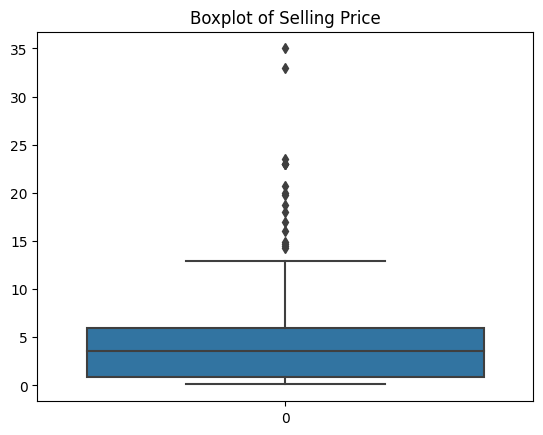

(299, 9)


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [13]:
# Check for outliers in Selling Price
sns.boxplot(dataset['Selling_Price'])
plt.title("Boxplot of Selling Price")
plt.show()

# Remove outliers
dataset = dataset[~((dataset['Selling_Price'] >= 33.0) & (dataset['Selling_Price'] <= 35.0))]

# Display the updated dataset and its shape
print(dataset.shape)
dataset.head()


In [14]:
#Step 6: Encode Categorical Columns

In [15]:
# Map categorical columns to numerical values
dataset['Fuel_Type'] = dataset['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
dataset['Seller_Type'] = dataset['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
dataset['Transmission'] = dataset['Transmission'].map({'Manual': 0, 'Automatic': 1})

# Save the encoded dataset
dataset.to_csv(updated_file_path, index=False)
dataset.head()


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [16]:
#step7:Step 7: Split Dataset into Features and Target

In [17]:
# Define features (X) and target (y)
X = dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = dataset['Selling_Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)


Shape of Training Data: (239, 7)
Shape of Testing Data: (60, 7)


In [18]:
#Step 8: Train Models

In [20]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
#step 9: Evaluate Models

In [22]:
# Predict on test data
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gbr.predict(X_test)
y_pred4 = xgb.predict(X_test)

# Calculate R-squared scores
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

# Compile results
results = pd.DataFrame({
    'Models': ['Linear Regression', 'Random Forest', 'GB Regressor', 'XGB Regressor'],
    'R-Squared (%)': [score1 * 100, score2 * 100, score3 * 100, score4 * 100]
})

# Display results
results

,Models,R-Squared (%)
0,Linear Regression,67.908850
1,Random Forest,74.845002
2,GB Regressor,86.946927
3,XGB Regressor,88.648394


In [24]:
#Step 10: Plot Model Performance

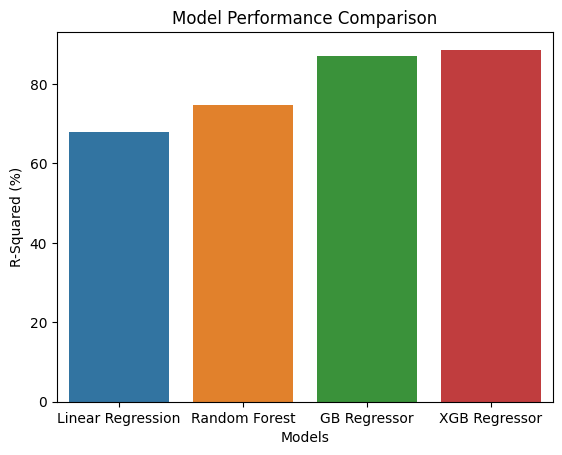

In [25]:
# Plot model accuracies
sns.barplot(x='Models', y='R-Squared (%)', data=results)
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("R-Squared (%)")
plt.show()


In [26]:
#Step 11: Save the Best Model

In [27]:
# Train and save the best model (XGBoost)
xg_final = XGBRegressor().fit(X, y)
joblib.dump(xg_final, 'Car_Price_Predictor.pkl')
print("Model saved as 'Car_Price_Predictor.pkl'")


Model saved as 'Car_Price_Predictor.pkl'


In [28]:
#Step 12: Data Predictor:

In [32]:
# Load the saved model
model = joblib.load('Car_Price_Predictor.pkl')

# Create input widgets
present_price = widgets.FloatText(description='Present_Price:')
kms_driven = widgets.FloatText(description='Kms_Driven:')
fuel_type = widgets.Dropdown(
    options=[('Petrol', 0), ('Diesel', 1), ('CNG', 2)],
    value=0,
    description='Fuel_Type:'
)
seller_type = widgets.Dropdown(
    options=[('Dealer', 0), ('Individual', 1)],
    value=0,
    description='Seller_Type:'
)
transmission = widgets.Dropdown(
    options=[('Manual', 0), ('Automatic', 1)],
    value=0,
    description='Transmission:'
)
owner = widgets.IntText(description='Owner:')
age = widgets.IntText(description='Age:')

# Create output widget
output = widgets.Output()

# Prediction function
def predict_car_price(change):
    data = pd.DataFrame({
        'Present_Price': [present_price.value],
        'Kms_Driven': [kms_driven.value],
        'Fuel_Type': [fuel_type.value],
        'Seller_Type': [seller_type.value],
        'Transmission': [transmission.value],
        'Owner': [owner.value],
        'Age': [age.value]
    })
    result = model.predict(data)
    with output:
        output.clear_output()
        print(f"Predicted Selling Price: {result[0]:.2f}")

# Button widget
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_car_price)

# Arrange and display the GUI
inputs = widgets.VBox([present_price, kms_driven, fuel_type, seller_type, transmission, owner, age, predict_button])
display(inputs, output)

#For sample data format is given below

#'Present_Price': [5.59],
#'Kms_Driven': [27000],
#'Fuel_Type': [0,1,2],
#'Seller_Type': [0,1],
#'Transmission': [0,1],
#'Owner': [0],
#'Age': [8]




Output()